# More on Jacobi Constant and Zero Velocity Curve
## Given:
Earth-Moon System in a 3BCRP, assume positon and velocity:
$$\vec{r} = -0.27 \hat{x} - 0.42 \hat{y}$$
$$\vec{v} = 0.3\hat{x} - 1\hat{y}$$

## Find:
a) Plot ZVC and does the trajectory violate it?

b) Change value of Jacobi constant such that there are 2 circle. One around the primary and the other around the secodary.

c) Try a Jacobi that opens the gateway and see if the trajectory escapes.


In [9]:
# Import Functions and basic infor
import sys
sys.path.append('../')
from Functions.Universe import G
from Functions.Universe import Solar_3 as SS3
from Functions import Keplarian_fnc as kp
from Functions import Poincare_fnc as pn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [10]:
# Given 
system = "Earth-Moon"
r_vec = np.array([-.27, -.42, 0])
v_vec = np.array([.3, -1, 0])

gamma2, L2 = pn.L2_Newton(SS3.loc[system,'miu'],  0.01)
gamma1, L1 = pn.L1_Newton(SS3.loc[system,'miu'],  0.01)
gamma3, L3 = pn.L3_Newton(SS3.loc[system,'miu'],  0.9)



### Part a)

Time taken (days):  2171.239922753874


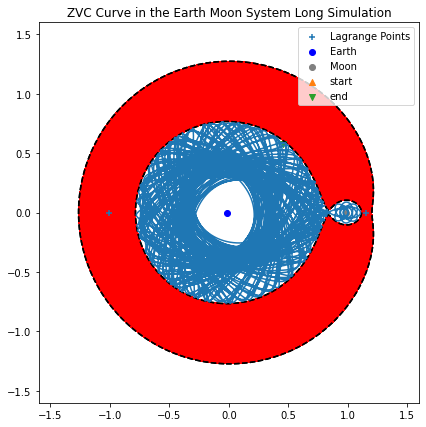

In [11]:
t_span = [0, 500]
IC = np.append(r_vec, v_vec) 
sol = solve_ivp(lambda t, x: pn.cr3bp_df(t, x, SS3.loc[system,'miu']), t_span , IC, method='RK45',
                rtol=10**-12, atol=10**-16)

grid = np.linspace(-1.6,1.6,2000)
v = np.linalg.norm(v_vec)

[X, Y] = np.meshgrid(grid, grid)
C = pn.Jacobi_const(X, Y, 0, 0, SS3.loc[system,'miu'])
C0 = pn.Jacobi_const(r_vec[0], r_vec[1], r_vec[2], v, SS3.loc[system,'miu'])

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7,7))
axs.contourf(X,Y, -C, levels = [-C0, -C0+10**-12], extend = 'max', cmap = 'rainbow')
axs.contour(X,Y, -C, levels = [-C0, -C0+10**-12], colors='black')
axs.scatter([L1, L2, L3],[0, 0, 0], marker="+", label = 'Lagrange Points')
axs.scatter(-SS3.loc[system, 'miu'],0, marker = 'o', color='blue', label='Earth')
axs.scatter(1-SS3.loc[system, 'miu'],0, marker='o', color='grey', label='Moon')
axs.set_aspect('equal', 'box')
axs.set_title('ZVC Curve in the Earth Moon System Long Simulation')
axs.plot(sol.y[0,:],sol.y[1,:])
axs.scatter(sol.y[0,0],sol.y[1,0], marker='^', label="start")
axs.scatter(sol.y[0,-1],sol.y[1,-1], marker='v', label="end")
axs.legend()

print("Time taken (days): ", pn.t_2_dim(t_span[-1], SS3.loc[system,'t*'])/ 3600/ 24)

### Part b)

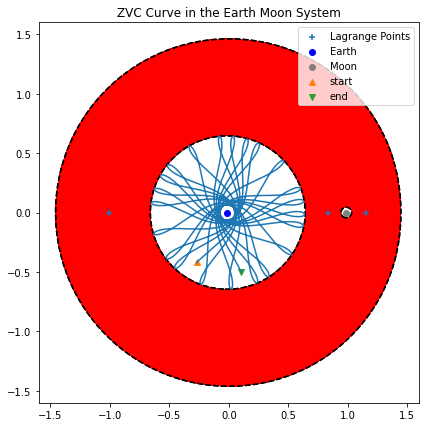

In [12]:
C02 = 3.5

vmag = np.sqrt(pn.Jacobi_const(r_vec[0], r_vec[1], r_vec[2], 0, SS3.loc[system,'miu']) - C02)
v = vmag * np.array([1, 1, 0])/np.sqrt(2)

t_span = [0, 30]
IC = np.append(r_vec, v) 
sol = solve_ivp(lambda t, x: pn.cr3bp_df(t, x, SS3.loc[system,'miu']), t_span , IC, method='RK45',
                rtol=10**-12, atol=10**-16)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7,7))
axs.contourf(X,Y, -C, levels = [-C02, -C02+10**-12], extend = 'max', cmap = 'rainbow')
axs.contour(X,Y, -C, levels = [-C02, -C02+10**-12], colors='black')
axs.scatter([L1, L2, L3],[0, 0, 0], marker="+", label = 'Lagrange Points')
axs.scatter(-SS3.loc[system, 'miu'],0, marker = 'o', color='blue', label='Earth')
axs.scatter(1-SS3.loc[system, 'miu'],0, marker='o', color='grey', label='Moon')
axs.set_aspect('equal', 'box')
axs.set_title('ZVC Curve in the Earth Moon System')
axs.plot(sol.y[0,:],sol.y[1,:])
axs.scatter(sol.y[0,0],sol.y[1,0], marker='^', label="start")
axs.scatter(sol.y[0,-1],sol.y[1,-1], marker='v', label="end")
axs.legend()


### Part c)

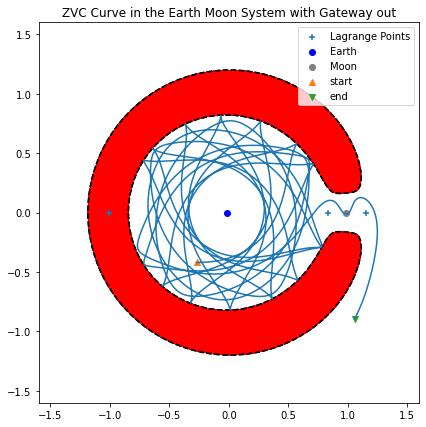

In [13]:
C02 = 3.1

vmag = np.sqrt(pn.Jacobi_const(r_vec[0], r_vec[1], r_vec[2], 0, SS3.loc[system,'miu']) - C02)
v = vmag * np.array([1, 0, 0])

t_span = [0, 80]
IC = np.append(r_vec, v) 
sol = solve_ivp(lambda t, x: pn.cr3bp_df(t, x, SS3.loc[system,'miu']), t_span , IC, method='RK45',
                rtol=10**-12, atol=10**-16)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7,7))
axs.contourf(X,Y, -C, levels = [-C02, -C02+10**-12], extend = 'max', cmap = 'rainbow')
axs.contour(X,Y, -C, levels = [-C02, -C02+10**-12], colors='black')
axs.scatter([L1, L2, L3],[0, 0, 0], marker="+", label = 'Lagrange Points')
axs.scatter(-SS3.loc[system, 'miu'],0, marker = 'o', color='blue', label='Earth')
axs.scatter(1-SS3.loc[system, 'miu'],0, marker='o', color='grey', label='Moon')
axs.set_aspect('equal', 'box')
axs.set_title('ZVC Curve in the Earth Moon System with Gateway out')
axs.plot(sol.y[0,:],sol.y[1,:])
axs.scatter(sol.y[0,0],sol.y[1,0], marker='^', label="start")
axs.scatter(sol.y[0,-1],sol.y[1,-1], marker='v', label="end")
axs.legend()
